In [1]:
# !jt -t chesterish -T -N

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Understanding the dataset

This dataset belongs to Kaggle's Toxic Comment Classification Challenge by Jigsaw.

Link - https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

There are 15957 datapoints and 8 columns, which includes 6 target_columns and text column.

In [3]:
df = pd.read_csv("jigsaw-toxic-comment-classification-challenge/train.csv",encoding='latin-1')
print(df.shape)

(159571, 8)


In [4]:
print(df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


### Analyzing the text columns

In [5]:
# To split only into text and result
#For the text
comment = df['comment_text']
print(comment.head())

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object


### Analyzing six target columns

In [6]:
#For the other labels
label = df[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head(7))

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0
5      0             0        0       0       0              0
6      1             1        1       0       1              0


# Data Visualization

###  Visualizating data to see the average characters in each row

average length of row: 394.712


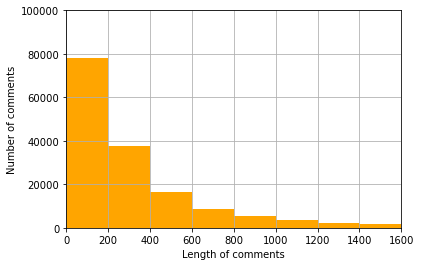

In [7]:
x = [len(comment[i]) for i in range(comment.shape[0])]
print('average length of row: {:.3f}'.format(sum(x)/len(x)))
ranges = [0,200,400,600,800,1000,1200,1400,1600]
plt.hist(x, bins = ranges, color=['orange'])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')    
plt.axis([0, 1600, 0, 100000])
plt.grid(True)
plt.show()


###  Finding the number of comments for each label

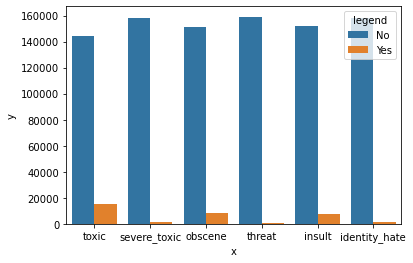

In [8]:
toxic_count = df['toxic'].value_counts()
severe_toxic_count = df['severe_toxic'].value_counts()
obscene_count = df['obscene'].value_counts()
threat_count = df['threat'].value_counts()
insult_count = df['insult'].value_counts()
identity_hate_count = df['identity_hate'].value_counts()

df0=pd.DataFrame({'x':['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],'y':[toxic_count[0], severe_toxic_count[0], obscene_count[0], threat_count[0], insult_count[0], identity_hate_count[0]]})
df1=pd.DataFrame({'x':['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],'y':[toxic_count[1], severe_toxic_count[1], obscene_count[1], threat_count[1], insult_count[1], identity_hate_count[1]]})

df0['legend']='No'
df1['legend']='Yes'
df_final=pd.concat([df0,df1])
sns.barplot(x='x',y='y', data=df_final, hue='legend')
plt.show()

# Splitting training data and preprocessing using tfidf vectorizer.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.00009, smooth_idf=True, norm="l2", tokenizer = lambda x: x.split(" "), sublinear_tf=False, ngram_range=(1,2), stop_words='english')
comment = vectorizer.fit_transform(comment)

# X : comment, y : label
X_train, X_test, y_train, y_test = train_test_split(comment, label, test_size=0.1)

print("Dimensions of train data X:",X_train.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",X_test.shape,"Y:",y_test.shape)


print(X_train)
print(y_train)

Dimensions of train data X: (143613, 42136) Y : (143613, 6)
Dimensions of test data X: (15958, 42136) Y: (15958, 6)
  (0, 4560)	0.6880169084485674
  (0, 13453)	0.5730979445380758
  (0, 8501)	0.349519191000706
  (0, 21380)	0.2435146004105187
  (0, 0)	0.12933852544476332
  (1, 17588)	0.2844574209294161
  (1, 22719)	0.2759834165670613
  (1, 15809)	0.2571681906972783
  (1, 17816)	0.2658629327733081
  (1, 11093)	0.2553589471739581
  (1, 6519)	0.2861569439807937
  (1, 34720)	0.24000666800300255
  (1, 27263)	0.20483907217672787
  (1, 2349)	0.2239829186556813
  (1, 16405)	0.2202395603789883
  (1, 7957)	0.21753735525537302
  (1, 38898)	0.12055148727998509
  (1, 9681)	0.15860650985999358
  (1, 15632)	0.15062056615495903
  (1, 11175)	0.1409227279860479
  (1, 29459)	0.16305161383882333
  (1, 7989)	0.1442677467540799
  (1, 17814)	0.13902739761571045
  (1, 6518)	0.16404542370913855
  (1, 6526)	0.17741529604794845
  :	:
  (143610, 19174)	0.2133466217030899
  (143610, 30313)	0.13239347851952415
  (143

# Evaluation Metrics

In [10]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_metrics(y_test, y_pred): 
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy     : ", accuracy*100)
    
    hammingLoss = hamming_loss(y_test, y_pred)
    print("Hamming_loss : ", hammingLoss*100)
    
    logLoss = log_loss(y_test, y_pred)
    print("Log_loss     : ", logLoss)

# Building the model with : OneVsRestClassifier and Logistic Regression.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

classifier_OVR = OneVsRestClassifier(LogisticRegression(penalty='l2', class_weight='balanced', verbose=1), n_jobs=-1)
classifier_OVR.fit(X_train, y_train)
predictions = classifier_OVR.predict(X_test)

In [12]:
score = classifier_OVR.score(X_test, y_test)
evaluate_metrics(y_test, predictions)

Accuracy     :  86.11981451309688
Hamming_loss :  3.7295818189413876
Log_loss     :  0.7586677373644679


In [13]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.83      0.68      1502
           1       0.27      0.86      0.41       169
           2       0.61      0.84      0.71       859
           3       0.16      0.74      0.26        34
           4       0.49      0.84      0.62       774
           5       0.19      0.70      0.30       134

   micro avg       0.49      0.83      0.62      3472
   macro avg       0.38      0.80      0.50      3472
weighted avg       0.53      0.83      0.64      3472
 samples avg       0.06      0.08      0.06      3472



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
sentence = 'I hate that you love me'
sentence1 = 'I like how you are bad'
sentence3 = 'I'
y_pred1 = classifier_OVR.predict(vectorizer.transform([sentence3]))
y_pred_OVR = classifier_OVR.predict_proba(vectorizer.transform([sentence3]))
print(label.head(1))
print(y_pred_OVR)
print(y_pred1)


   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
[[0.2860727  0.07396809 0.15887944 0.01557929 0.18752062 0.09290185]]
[[0 0 0 0 0 0]]


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

# alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
# parameters  = {"estimator__C":alpha, "estimator__penalty":['l2']}

# base_estimator_one = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
# randomized_search = RandomizedSearchCV(estimator=base_estimator_one, param_distributions=parameters, n_iter=10, cv=5, scoring='f1_micro', n_jobs=-1, verbose=0)
# randomized_search.fit(X_train, y_train)
# print("Best estimator:              ",randomized_search.best_estimator_)
# print("Best Cross Validation Score: ",randomized_search.best_score_)


In [16]:
# classifier_OVR_best = randomized_search.best_estimator_
classifier_OVR_best = OneVsRestClassifier(estimator=LogisticRegression(C=1, class_weight='balanced'), n_jobs=-1)

classifier_OVR_best.fit(X_train, y_train)

pred_OVR_best = classifier_OVR_best.predict(X_test)
pred_proba_OVR_best = classifier_OVR_best.predict_proba(X_test)

evaluate_metrics(y_test, pred_OVR_best)

Accuracy     :  86.11981451309688
Hamming_loss :  3.7295818189413876
Log_loss     :  0.7586677373644679


In [17]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_OVR_best, target_names=['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']))

               precision    recall  f1-score   support

        toxic       0.58      0.83      0.68      1502
 severe_toxic       0.27      0.86      0.41       169
      obscene       0.61      0.84      0.71       859
       threat       0.16      0.74      0.26        34
       insult       0.49      0.84      0.62       774
identity_hate       0.19      0.70      0.30       134

    micro avg       0.49      0.83      0.62      3472
    macro avg       0.38      0.80      0.50      3472
 weighted avg       0.53      0.83      0.64      3472
  samples avg       0.06      0.08      0.06      3472



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
sentence = 'I love you'

y_pred_OVR_best = classifier_OVR_best.predict_proba(vectorizer.transform([sentence]))
y_pred1 = classifier_OVR_best.predict(vectorizer.transform([sentence]))

print(label.head(1))
print(y_pred_OVR_best)
print(y_pred1)

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
[[0.33673831 0.04342265 0.29820203 0.00486627 0.17149079 0.24371602]]
[[0 0 0 0 0 0]]


# Building the model with : K-Nearest Neighbor.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# # k_range = range(1,41)

# #Tuning k using gridsearch, or in other words, finding the best possible k value
# k_array = [1]
# # for i in k_range:
# #     k_array.append(i)

# grid_params = {'n_neighbors':k_array}
# gs = GridSearchCV(KNeighborsClassifier(),grid_params)
# gs_results = gs.fit(X_train,y_train)

# k_val = gs_results.best_score_
# # print("Best score",gs_results.best_score_)
# print("Best estimator:              ",gs_results.best_estimator_)
# print("Best Cross Validation Score: ",gs_results.best_score_)

In [21]:
# classifier_KNN_best = gs_results.best_estimator_ #This is the best possible k value obtained
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN_best = KNeighborsClassifier(n_neighbors=1)
classifier_KNN_best.fit(X_train, y_train)

pred_KNN_best = classifier_KNN_best.predict(X_test)
evaluate_metrics(y_test, pred_KNN_best)

Accuracy     :  89.12144378994861
Hamming_loss :  3.3431507707732795
Log_loss     :  0.853682250767811


In [22]:
# have to do classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_KNN_best, target_names=['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']))

               precision    recall  f1-score   support

        toxic       0.62      0.28      0.39      1502
 severe_toxic       0.35      0.25      0.30       169
      obscene       0.66      0.31      0.43       859
       threat       0.12      0.06      0.08        34
       insult       0.56      0.27      0.37       774
identity_hate       0.30      0.14      0.19       134

    micro avg       0.58      0.28      0.38      3472
    macro avg       0.44      0.22      0.29      3472
 weighted avg       0.59      0.28      0.38      3472
  samples avg       0.02      0.02      0.02      3472



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
sentence = 'I like you'
y_pred_KNN = classifier_KNN_best.predict(vectorizer.transform([sentence]))

print(label.head(1))
print(y_pred_KNN)

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
[[0 0 0 0 0 0]]
